In [3]:
# Let's run the preprocessing on both train and test data
from libs.simple_processing import normalize, separate_target, dropna_rows, remove_columns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from constants import source_path, target_name, x_path, y_path

X = pd.read_csv(x_path)
y = pd.read_csv(y_path)

print(X.shape)

(1599, 12)


X shape:  (1599, 11)
> Reducer: none
> Model: GradientBoostingClassifier
- F1 score:  0.6971766576002016
- cv:  2

> Reducer: PCA(n_components='mle')
- X reduced shape:  (1599, 10)
> Model: GradientBoostingClassifier


/Users/kkepins-macwro_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


- F1 score:  0.7174454442827287
- cv:  2

> Reducer: UMAP(learning_rate=0.005, n_components=10, n_epochs=500)


/Users/kkepins-macwro_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


- X reduced shape:  (1599, 10)
> Model: GradientBoostingClassifier
- F1 score:  0.6169716603801975
- cv:  2

Done.


/Users/kkepins-macwro_1/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


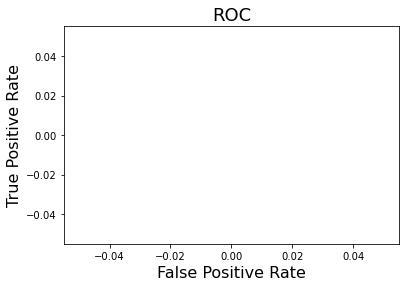

In [2]:
from sklearn.model_selection import GridSearchCV
from libs.simple_processing import categorize_train_valid_test, train_test_split, categorize
from sklearn.ensemble import GradientBoostingClassifier
from libs.simple_hyper_tuner import predict_print_valid_scores
from libs.simple_hyper_tuner import gridsearchcv_tuner
import umap
from sklearn import decomposition
from sklearn import svm
from sklearn.linear_model import LogisticRegression, LinearRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

splitter_params  = {'train_size': [0.8], 'random_state': [50]}
target_dimensions = 8
n_neighbors = 10
cv = [2]

params = [
    {   # F1 score:  0.6971766576002016
        'splitter': splitter_params, 'cv': cv,
        'model': GradientBoostingClassifier(
            n_estimators=400, random_state=0, learning_rate=0.025, max_depth=5, max_features="auto"),
        'hyperparams': {},
        'reducer': {}
    },
    {   # F1 score:  0.7174454442827287
        'splitter': splitter_params, 'cv': cv,
        'model': GradientBoostingClassifier(
            n_estimators=1400, learning_rate=0.005, random_state=0, max_depth=5, max_features="auto"),
        'hyperparams': {},
        'reducer': decomposition.PCA(n_components='mle')
    },
    {   # F1 score:  0.6169716603801975
        'splitter': splitter_params, 'cv': cv,
        'model': GradientBoostingClassifier(
            n_estimators=400, random_state=0, learning_rate=0.025, max_depth=5, max_features="auto"),
        'hyperparams': {},
        'reducer': umap.UMAP(n_components=10, n_epochs=500, learning_rate=0.005)
    },
    # {   # F1 score:  0.7174454442827287
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': GradientBoostingClassifier(
    #         n_estimators=1400, random_state=0, learning_rate=0.005, max_depth=5, max_features="auto"),
    #     'hyperparams': {},
    #     'reducer': decomposition.PCA(n_components='mle')
    # },
    # {   # F1 score:  0.7174454442827287
    #     'splitter': splitter_params, 'cv': [5],
    #     'model': XGBClassifier(n_estimators=100),
    #     'hyperparams': {},
    #     'reducer': decomposition.PCA(n_components='mle')
    # },
    # {   # F1 score:  0.6705686795994994
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': XGBClassifier(n_estimators=100),
    #     'hyperparams': {},
    #     'reducer': umap.UMAP(n_components=10, n_epochs=50, learning_rate=0.001)
    # },
    # {
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': GradientBoostingClassifier(
    #         n_estimators=400, random_state=0, learning_rate=0.025, max_depth=5, max_features="auto"),
    #     'hyperparams': {},
    #     'reducer': umap.UMAP(n_components=10)
    # },
    # {
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': GradientBoostingClassifier(
    #         n_estimators=400, random_state=0, learning_rate=0.025, max_depth=5, max_features="auto"),
    #     'hyperparams': {},
    #     'reducer': umap.UMAP(n_components=10, n_epochs=500, learning_rate=0.025)
    # },
    # {   # F1 score:  0.6493902043719906
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': GradientBoostingClassifier(
    #         n_estimators=400, random_state=0, learning_rate=0.025, max_depth=5, max_features="auto"),
    #     'hyperparams': {},
    #     'reducer': umap.UMAP(n_components=10, n_epochs=1000, learning_rate=0.001)
    # },
    # {
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': GradientBoostingClassifier(
    #         n_estimators=400, random_state=0, learning_rate=0.025, max_depth=5, max_features="auto"
    #     ),
    #     'hyperparams': {},
    #     'reducer': umap.UMAP(n_neighbors=n_neighbors, n_components=target_dimensions),
    # },
    # {
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': svm.SVC(
    #         # kernel="poly"
    #         # , decision_function_shape="ovr"
    #         # , C=1
    #         # , probability=True
    #     ),
    #     'hyperparams': {},
    #     'reducer': umap.UMAP(n_neighbors=n_neighbors, n_components=target_dimensions),
    # },
    # {
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': svm.LinearSVC(max_iter=1000),
    #     'hyperparams': {},
    #     'reducer': umap.UMAP(n_neighbors=n_neighbors, n_components=target_dimensions),
    # },
    #
    # {   # F1 score:  0.5226810499043859
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': AdaBoostClassifier(n_estimators=1500, random_state=50),
    #     'hyperparams': {},
    #     'reducer': decomposition.PCA(n_components='mle')
    # },
    # {   # F1 score:  0.5167932412790698
    #     'splitter': splitter_params, 'cv': [4],
    #     'model': AdaBoostClassifier(),
    #     'hyperparams': {},
    #     'reducer': umap.UMAP(n_neighbors=n_neighbors, n_components=target_dimensions)
    # },
    # {
    #     'splitter': splitter_params, 'cv': [4],
    #     'model': LogisticRegression(max_iter=1000),
    #     'hyperparams': {},
    #     'reducer': decomposition.PCA(n_components=target_dimensions)
    # },
    # {
    #     'splitter': splitter_params, 'cv': [4],
    #     'model': LogisticRegression(max_iter=1000),
    #     'hyperparams': {},
    #     'reducer': umap.UMAP(n_neighbors=n_neighbors, n_components=target_dimensions)
    # },
    # {
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': GaussianNB(),
    #     'hyperparams': {},
    #     'reducer': decomposition.PCA(n_components=7)
    # },
    # {
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': GaussianNB(),
    #     'hyperparams': {},
    #     'reducer': umap.UMAP(n_neighbors=10, n_components=7)
    # },
    # {
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': GradientBoostingClassifier(
    #         n_estimators=400, random_state=0, learning_rate=0.025, max_depth=5, max_features="auto"
    #     ),
    #     'hyperparams': {},
    #     'reducer': decomposition.PCA(n_components=6)
    # },
    # {
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': GradientBoostingClassifier(
    #         n_estimators=400, random_state=0, learning_rate=0.025, max_depth=5, max_features="auto"
    #     ),
    #     'hyperparams': {},
    #     'reducer': decomposition.PCA(n_components=target_dimensions)
    # },
    # {
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': XGBClassifier(),
    #     'hyperparams': {},
    #     'reducer': decomposition.PCA(n_components=target_dimensions)
    # },
    # {
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': svm.SVC(
    #         # kernel="poly"
    #         # , decision_function_shape="ovr"
    #         # , C=1
    #         # , probability=True
    #     ),
    #     'hyperparams': {},
    #     'reducer': decomposition.PCA(n_components=target_dimensions)
    # },
    # {
    #     'splitter': splitter_params, 'cv': [2],
    #     'model': svm.LinearSVC(max_iter=1000),
    #     'hyperparams': {},
    #     'reducer': decomposition.PCA(n_components=target_dimensions)
    # }
]

winner = gridsearchcv_tuner(X, y, params, 0, False)
